In [2]:
from summarizer import Summarizer


In [4]:
class PythonPredictor:
    def __init__(self, config):
        self.model = Summarizer()

    def predict(self, payload):
        return self.model(payload["text"])

In [36]:
text = """
First Quarter Highlights
• March 31, 2020: The Company completed the work required to develop a well-constrained geological
model of the Saddle North gold-rich copper porphyry in northern British Columbia. Published in April,
the model comprises a robust three-dimensional digital representation of lithology, alteration,
mineralization and structure, which will be used as the basis for both the initial mineral resource
estimate anticipated to be released by the end of June 2020, as well as a Preliminary Economic
Assessment for Saddle North expected by year-end.
• February 20, 2020: GT Gold reported positive results for initial metallurgical test work on two composite
samples from the Saddle North Cu-Au porphyry, showing favourable recoveries for both high- and
lower-grade composites as well as the potential for a simple, conventional flowsheet for Saddle North
style mineralization.
• January 16, 2020: The Company announced the results from the final holes of the 2019 drilling
program at the Saddle South Au-Ag vein target.
“We are extremely pleased with our progress made to date in 2020,” commented Paul Harbidge, President
and Chief Executive Officer. “Despite the onset of the global COVID-19 pandemic, we have successfully
advanced the Saddle North project technicals on schedule and continue to expect to deliver an inaugural
resource by the end of next month. As we progress toward the summer field season, we continue to prioritize
the safety and protection of all employees and community members. We are fortunate that the Tahltan Central
Government has provided ongoing clear communication of expectations for cautions and protocols required
for work in Tahltan Territory and GT Gold will continue to align all work preparations according to both the
saftety requirements established by the Tahltan, as well as those outlined by the B.C. Provincial Health
Officer.”
At March 31, 2020, the Company had a cash position of C$14.4 million, which is expected to be sufficient to
fund all expenditures up to and including the Preliminary Economic Assessment (“PEA”), as well as to provide
a sizeable buffer for work following the PEA into 2021, to be planned based on the results of the 2020 technical
program.
"""
title = """GTGold Quarterly Report"""

In [21]:
from summarizer import summarize
fraction = len(text.split('.'))//3
summarize(title, text, count=fraction)

['I think it came from prioritising my happiness above other peoples’ and being curious to see what the outcomes of my actions would be.',
 'I was too focused on being happy right now to think about the outcomes of my actions.',
 'After the damage was done, I would feel horrible but forget about that feeling and do it again the next day.',
 'Do you think they would say those things about you if you died today?”',
 'I wanted people to say that I was:\n\nKind\nDriven\nFun to be around\nAnd none of those reflected my actions, so I started to change.',
 'I started to pause before doing mischievous things to think about the outcome on peoples’ perception of me.',
 'Today I don’t think there are only 3 things I want people to say about me when I die\u200a—\u200aI think there are a lot more.',
 'I made a list of all the things I think make an ideal person.',
 "Which can be generalised as:\n\nHas emotional control\nIsn’t a slave to external factors \nUnderstands themselves and the cause of the

In [27]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

texts_2 = [[text for text in doc.split()] for doc in documents_2]

# Create dictionary
dictionary = corpora.Dictionary(texts)
dictionary.add_documents(texts_2)

# Get information about the dictionary
print(dictionary)

Dictionary(60 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


In [28]:
print(dictionary.token2id)

{'Saudis': 0, 'The': 1, 'a': 2, 'acknowledge': 3, 'are': 4, 'preparing': 5, 'report': 6, 'that': 7, 'will': 8, 'Jamal': 9, "Khashoggi's": 10, 'Saudi': 11, 'an': 12, 'death': 13, 'journalist': 14, 'of': 15, 'result': 16, 'the': 17, 'was': 18, 'intended': 19, 'interrogation': 20, 'lead': 21, 'one': 22, 'to': 23, 'went': 24, 'wrong,': 25, 'Turkey,': 26, 'abduction': 27, 'according': 28, 'from': 29, 'his': 30, 'sources.': 31, 'two': 32, 'One': 33, 'conclude': 34, 'likely': 35, 'says': 36, 'source': 37, 'and': 38, 'carried': 39, 'clearance': 40, 'operation': 41, 'out': 42, 'without': 43, 'be': 44, 'held': 45, 'involved': 46, 'those': 47, 'transparency': 48, 'acknowledged': 49, 'responsible.': 50, 'sources': 51, 'being': 52, 'cautioned': 53, 'is': 54, 'prepared': 55, 'still': 56, 'change.': 57, 'could': 58, 'things': 59}


/home/lukepiette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


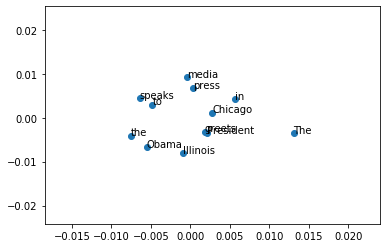

In [94]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
#             ['this', 'is', 'the', 'second', 'sentence'],
#             ['yet', 'another', 'sentence'],
#             ['one', 'more', 'sentence'],
#             ['and', 'the', 'final', 'sentence']]

doc1 = "Obama speaks to the media in Chicago"
doc2 = "The President greets the press in Illinois"
text = doc1 + "." + doc2
text = text.replace('\n',' ')
sentences = [list(filter(lambda a: a != '' and a != ':' and a != '•', text.split('.')[i].split(' '))) for i in range(len(text.split('.')))]

# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [95]:
model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentences)
total_examples = model_2.corpus_count
model = KeyedVectors.load_word2vec_format("glove.6B.300d.txt.w2vformat.txt", binary=False)
model_2.build_vocab([list(model.vocab.keys())], update=True)
model_2.intersect_word2vec_format("glove.6B.300d.txt.w2vformat.txt", binary=False, lockf=1.0)
model_2.train(sentences, total_examples=total_examples, epochs=model_2.iter)

# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/lukepiette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys
/home/lukepiette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


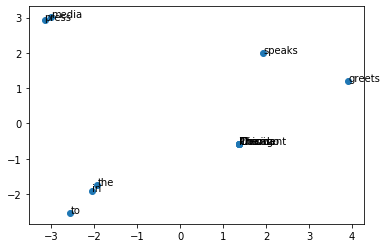

In [96]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [93]:
doc1 = "Obama speaks to the media in Chicago"
doc2 = "The President greets the press in Illinois"
text = doc1 + "." + doc2

In [ ]:
success = """
accomplishment
achievement
advance
benefit
boom
fame
gain
happiness
profit
progress
prosperity
realization
triumph
victory
win
arrival
ascendancy
attainment
clover
consummation
eminence
fortune
fruition
hit
killing
laugher
maturation
reward
"""

In [112]:
text = """
COVID-19 Response
In response to the challenges posed by the COVID-19 pandemic, GT Gold has taken steps to support the
health and safety of its employees and contractors. The Company has limited in-person meetings, postponed
business travel and mandated work from home where possible. Where work is being undertaken on drill core,
the Company’s workforce has been reduced to minimum personnel working under social distancing of two
metres. The Company is monitoring the situation and will act as recommended by the Federal and Provincial
governments. In addition, the Company has been in communications with the Tahltan Central Government
and is abiding by the protocols established within the Tahltan Territory, in which GT Gold’s 100% owned
Tatogga Project is located.
Technical Update
As at the end of March 2020, the 31,400-metre re-logging of Saddle North Cu-Au porphyry core has been
completed. Hand drawn sections and level plans of the interpreted data have been created, scanned and
georeferenced. These sections have been used to guide building a software-based 3D geological model. The
Company will host a technical webcast scheduled for April 29, 2020 at 10:00am Pacific (1:00pm Eastern) to
present the geological model and review exploration plans. Participants may access the webcast call as
follows:
 Online on the Company website at www.gtgoldcorp.ca
or via the direct link: https://edge.media-server.com/mmc/p/8dkog46v
 By phone at 1-888-337-1150 toll free in Canada or the U.S., or at 1-956-394-3454 internationally
 A recorded playback of the conference call will be available until May 6, 2020 by calling toll free
1-855-859-2056, or 1-404-537-3406 outside of the U.S. and Canada, conference ID 3484372. An
archived webcast will also be available for 12 months at www.gtgoldcorp.ca.
With the completion of the geological model, the initial resource estimate for Saddle North is expected to be
completed by the end of the second quarter of 2020. The Preliminary Economic Assessment (“PEA”) study
for Saddle North is currently on schedule for the fourth quarter of 2020.
“The delivery of the geological model is another milestone for GT Gold and will form the foundation to support
an initial resource estimate in the second quarter of this year”, said Paul Harbidge, President and CEO.
Harbidge continued, “GT Gold is in a fortunate position having raised funds in December, which can support
both field and office-based operations for an extended period. While the implementation of the 2020 field
season is pending, GT Gold has the technical data required to advance the project work in terms of resource
estimate, PEA preparation and exploration targeting”.
The program for the 2020 field season has been planned and would typically commence towards the end of
May. It will be executed depending on how the COVID-19 pandemic unfolds and will be implemented based
on Federal, Provincial and Tahltan Nation guidelines.
"""
title = """GTGold Quarterly Report"""

In [113]:
from textblob import TextBlob


blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
# 0.060
# -0.341

0.0
-0.03571428571428571
0.03333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.21666666666666667
0.4
-0.03333333333333333
0.06666666666666667
0.0
0.4
0.0
-0.16666666666666666
0.0


In [114]:
[print(i + "\n") for i in text.split('.')]


COVID-19 Response
In response to the challenges posed by the COVID-19 pandemic, GT Gold has taken steps to support the
health and safety of its employees and contractors

 The Company has limited in-person meetings, postponed
business travel and mandated work from home where possible

 Where work is being undertaken on drill core,
the Company’s workforce has been reduced to minimum personnel working under social distancing of two
metres

 The Company is monitoring the situation and will act as recommended by the Federal and Provincial
governments

 In addition, the Company has been in communications with the Tahltan Central Government
and is abiding by the protocols established within the Tahltan Territory, in which GT Gold’s 100% owned
Tatogga Project is located


Technical Update
As at the end of March 2020, the 31,400-metre re-logging of Saddle North Cu-Au porphyry core has been
completed

 Hand drawn sections and level plans of the interpreted data have been created, scanned and
g

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]